# Galactocentric coordinate plots

In [12]:
from utils import *

# Plot settings
plt.rc(('xtick', 'ytick'), direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc('font', family='STIXgeneral')
plt.rc('figure', dpi=140)
plt.rc('figure', figsize=(4, 4))

# Paths
# data_dir = '/users/PAS2055/lodubay/Data/APOGEE'
data_dir = 'C:\\Users\\dubay.11\\Data\\APOGEE'
# data_dir = '/home/dubay.11/Documents/Data/APOGEE'
data_path = Path(data_dir)

df = import_catalogs(data_path)
ages, low_age = get_discrepant_ages(df, diff_cut=-5)
metals, low_fe = get_discrepant_metallicities(df, diff_cut=-0.5)

Importing APOKASC catalog...
Importing astroNN DR17 catalog...
Importing StarHorse DR17 catalog...
Importing BACCHUS catalog...
Combining datasets...
Cleaning up...
Combining columns...
Done!


## Attempt with StarHorse parameters

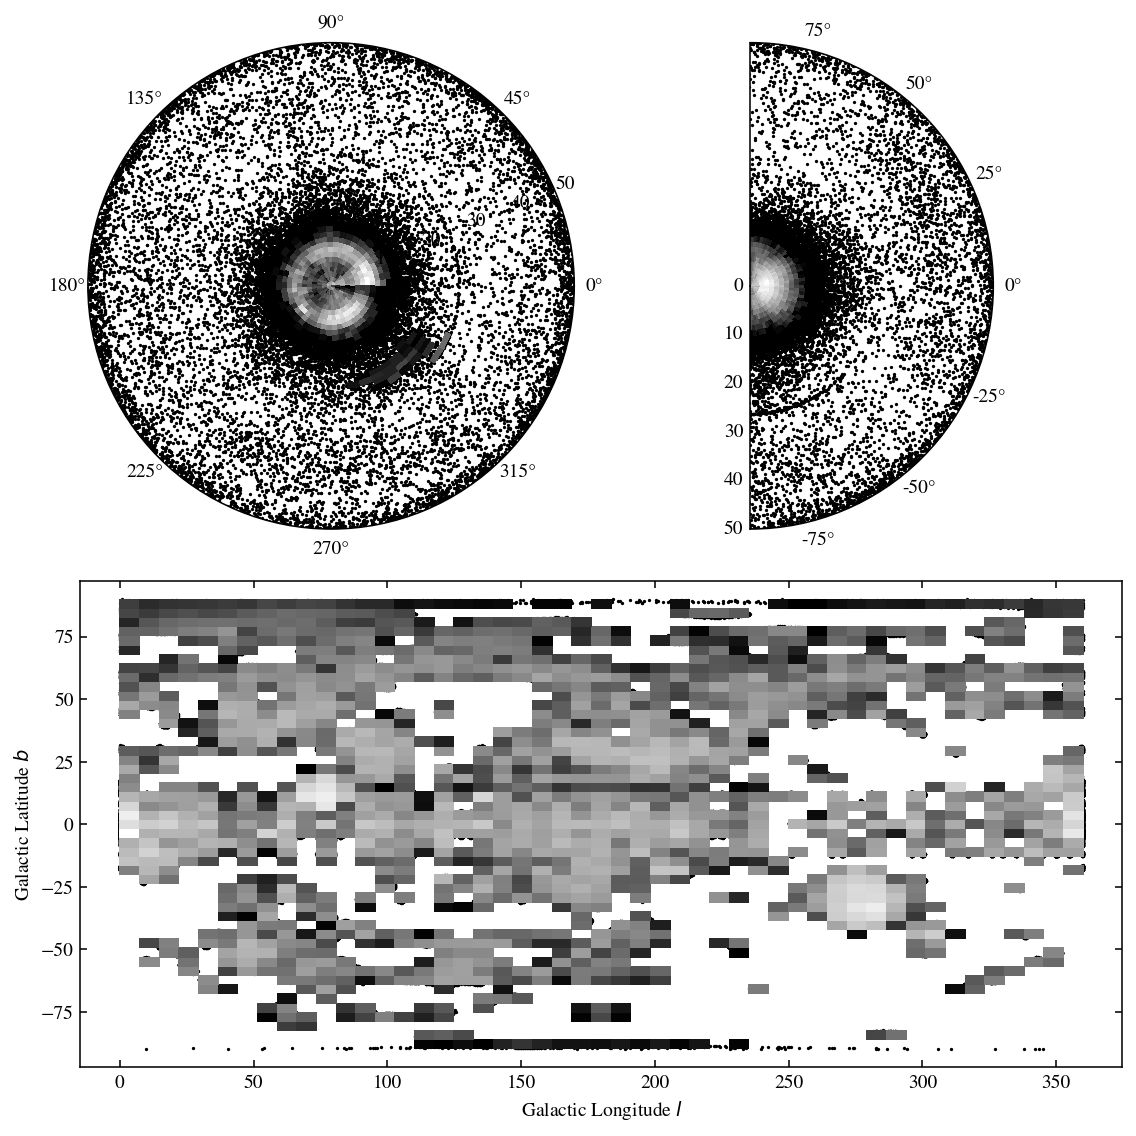

In [2]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
rlim = (0, 50)
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0,0], projection='polar')
ax.scatter(df['GLON'], df['STARHORSE_DIST'], c='k', s=.5)
ax.hist2d(df['GLON'], df['STARHORSE_DIST'],
          bins=[np.linspace(0, 2*np.pi, 50, endpoint=True), 
                np.linspace(rlim[0], rlim[1], 50, endpoint=True)],
          cmap='gray', norm=colors.LogNorm(), cmin=10)
ax.set_rlim(rlim)
# print(df['GLON'].max())
# scatter_hist(ax, df['GLON'] * (np.pi / 180), df['STARHORSE_DIST'], xlim=(0, 360))

ax = fig.add_subplot(gs[0,1], projection='polar')
ax.scatter(df['GLAT'], df['STARHORSE_DIST'], c='k', s=.5)
ax.hist2d(df['GLAT'], df['STARHORSE_DIST'],
          bins=[np.linspace(-np.pi/2, np.pi/2, 50, endpoint=True), 
                np.linspace(rlim[0], rlim[1], 50, endpoint=True)],
          cmap='gray', norm=colors.LogNorm(), cmin=10)

ax = fig.add_subplot(gs[1,:])
scatter_hist(ax, df['GLON'], df['GLAT'])
ax.set_xlabel('Galactic Longitude $l$')
ax.set_ylabel('Galactic Latitude $b$')

plt.show()

## Attempt with astroNN coordinates

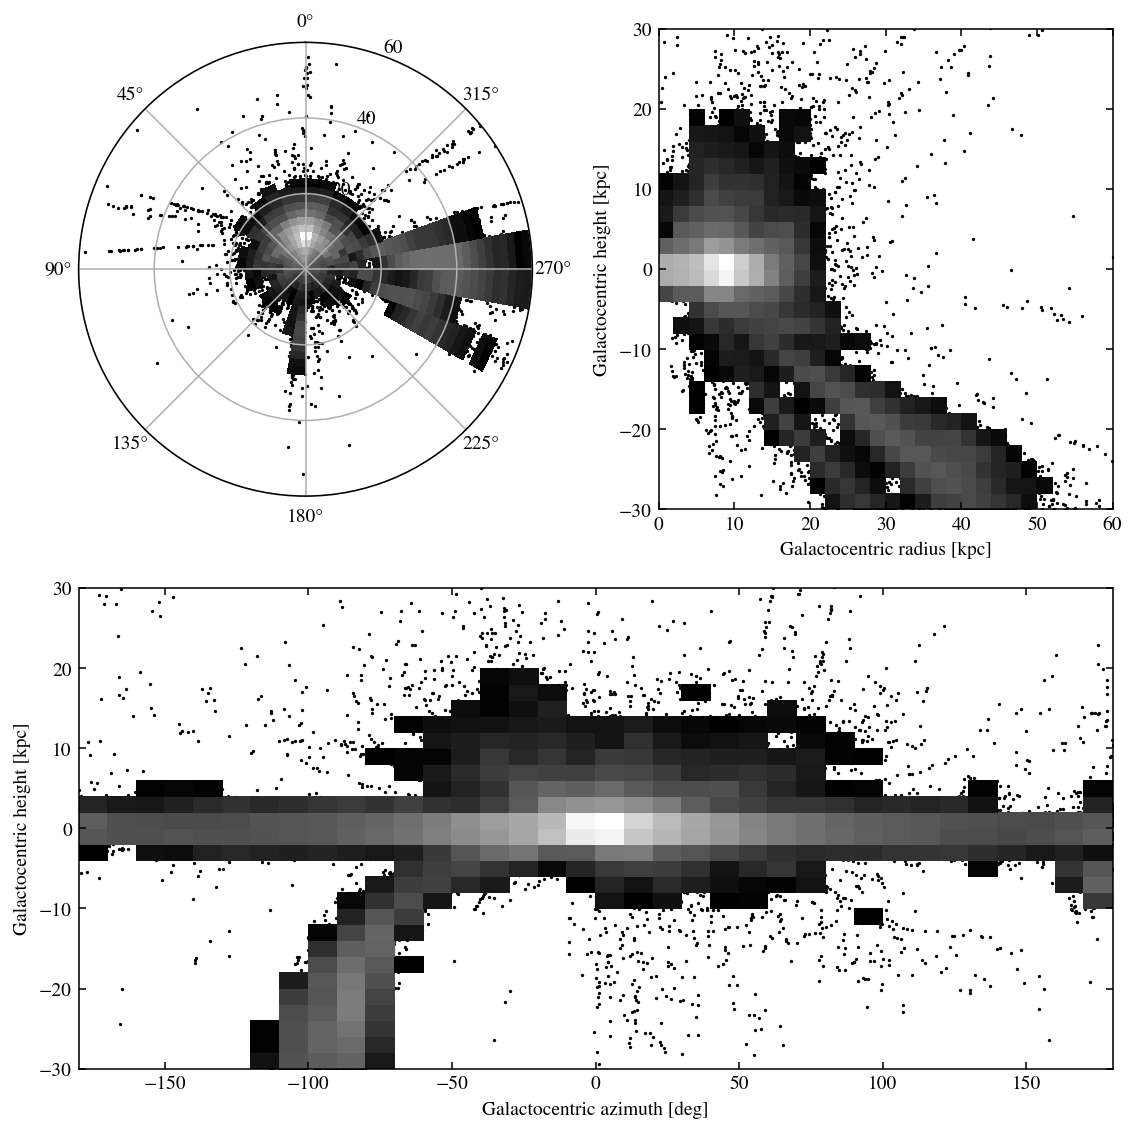

In [62]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0,0], projection='polar')
ax.scatter(df['ASTRONN_galphi'], df['ASTRONN_galr'], c='k', s=0.5)
ax.hist2d(df['ASTRONN_galphi'], df['ASTRONN_galr'], 
          bins=[np.linspace(-np.pi, np.pi, 37, endpoint=True), np.arange(0, 62, 2)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
# ax.scatter(low_alpha['ASTRONN_galphi'], low_alpha['ASTRONN_galr'], c='g', s=.6, label='[O/Fe] < -0.5')
ax.grid()
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(60)
ax.set_rticks([20, 40, 60])
ax.set_rlabel_position(340)
ax.set_xlim((0, 2*np.pi))

ax = fig.add_subplot(gs[0,1])
ax.scatter(df['ASTRONN_galr'], df['ASTRONN_galz'], c='k', s=0.5)
ax.hist2d(df['ASTRONN_galr'], df['ASTRONN_galz'], 
          bins=[np.arange(0, 62, 2), np.arange(-30, 32, 2)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
# ax.scatter(low_alpha['ASTRONN_galr'], low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim((0, 60))
ax.set_ylim((-30, 30))
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Galactocentric height [kpc]')

ax = fig.add_subplot(gs[1,:])
ax.scatter(df['ASTRONN_galphi'] * 180/np.pi, df['ASTRONN_galz'], c='k', s=.5)
ax.hist2d(df['ASTRONN_galphi'] * 180/np.pi, df['ASTRONN_galz'], 
          bins=[np.linspace(-180, 180, 37, endpoint=True), np.arange(-30, 32, 2)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
# ax.scatter(low_alpha['ASTRONN_galphi'] * 180/np.pi, low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlabel('Galactocentric azimuth [deg]')
ax.set_ylabel('Galactocentric height [kpc]')
# fig.legend(loc='upper left')
plt.show()

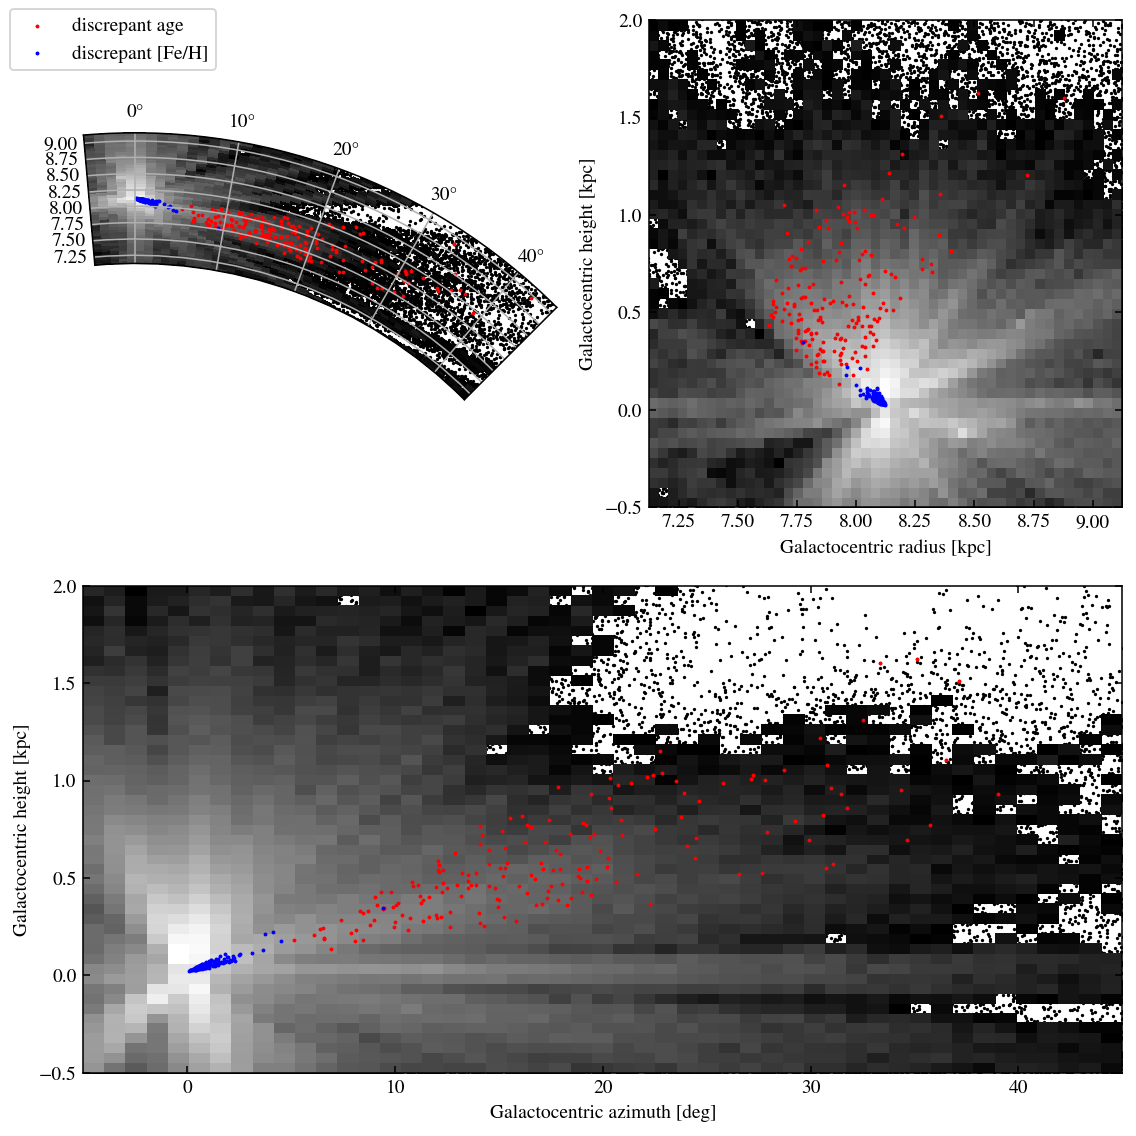

In [63]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
rlim = (7.125, 9.125)
philim_deg = (philim[0]*180/np.pi, philim[1]*180/np.pi)
philim = (-np.pi/36, np.pi/4)
zlim = (-0.5, 2)
gs = fig.add_gridspec(2, 2)

ax = fig.add_subplot(gs[0,0], projection='polar')
# scatter_hist(ax, df['ASTRONN_galphi'], df['ASTRONN_galr'], xlim=philim, ylim=rlim)
ax.scatter(df['ASTRONN_galphi'], df['ASTRONN_galr'], c='k', s=0.5)
ax.hist2d(df['ASTRONN_galphi'], df['ASTRONN_galr'], 
          bins=[np.linspace(philim[0], philim[1], 50), 
                np.linspace(rlim[0], rlim[1], 50)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
ax.scatter(low_age['ASTRONN_galphi'], low_age['ASTRONN_galr'], c='r', s=1, label='discrepant age')
ax.scatter(low_fe['ASTRONN_galphi'], low_fe['ASTRONN_galr'], c='b', s=1, label='discrepant [Fe/H]')
# ax.scatter(low_alpha['ASTRONN_galphi'], low_alpha['ASTRONN_galr'], c='g', s=.6, label='[O/Fe] < -0.5')
ax.grid()
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmin(rlim[0])
ax.set_rmax(rlim[1])
ax.set_rorigin(0)
# ax.set_rticks([20, 40, 60])
# ax.set_rlabel_position(340)
ax.set_xlim(philim)

ax = fig.add_subplot(gs[0,1])
scatter_hist(ax, df['ASTRONN_galr'], df['ASTRONN_galz'], xlim=rlim, ylim=zlim)
ax.scatter(low_age['ASTRONN_galr'], low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galr'], low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galr'], low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(rlim)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Galactocentric height [kpc]')

ax = fig.add_subplot(gs[1,:])
scatter_hist(ax, df['ASTRONN_galphi']*180/np.pi, df['ASTRONN_galz'], 
             xlim=philim_deg, ylim=zlim)
# ax.scatter(df['ASTRONN_galphi'] * 180/np.pi, df['ASTRONN_galz'], c='k', s=.5)
# ax.hist2d(df['ASTRONN_galphi'] * 180/np.pi, df['ASTRONN_galz'], 
#           bins=[np.linspace(philim[0]*180/np.pi, philim[1]*180/np.pi, 50, endpoint=True), 
#                 np.linspace(zlim[0], zlim[1], 50, endpoint=True)], 
#           cmap='gray', norm=colors.LogNorm(), cmin=10)
ax.scatter(low_age['ASTRONN_galphi']*180/np.pi, low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galphi']*180/np.pi, low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galphi'] * 180/np.pi, low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(philim_deg)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric azimuth [deg]')
ax.set_ylabel('Galactocentric height [kpc]')

fig.legend(loc='upper left')
plt.show()

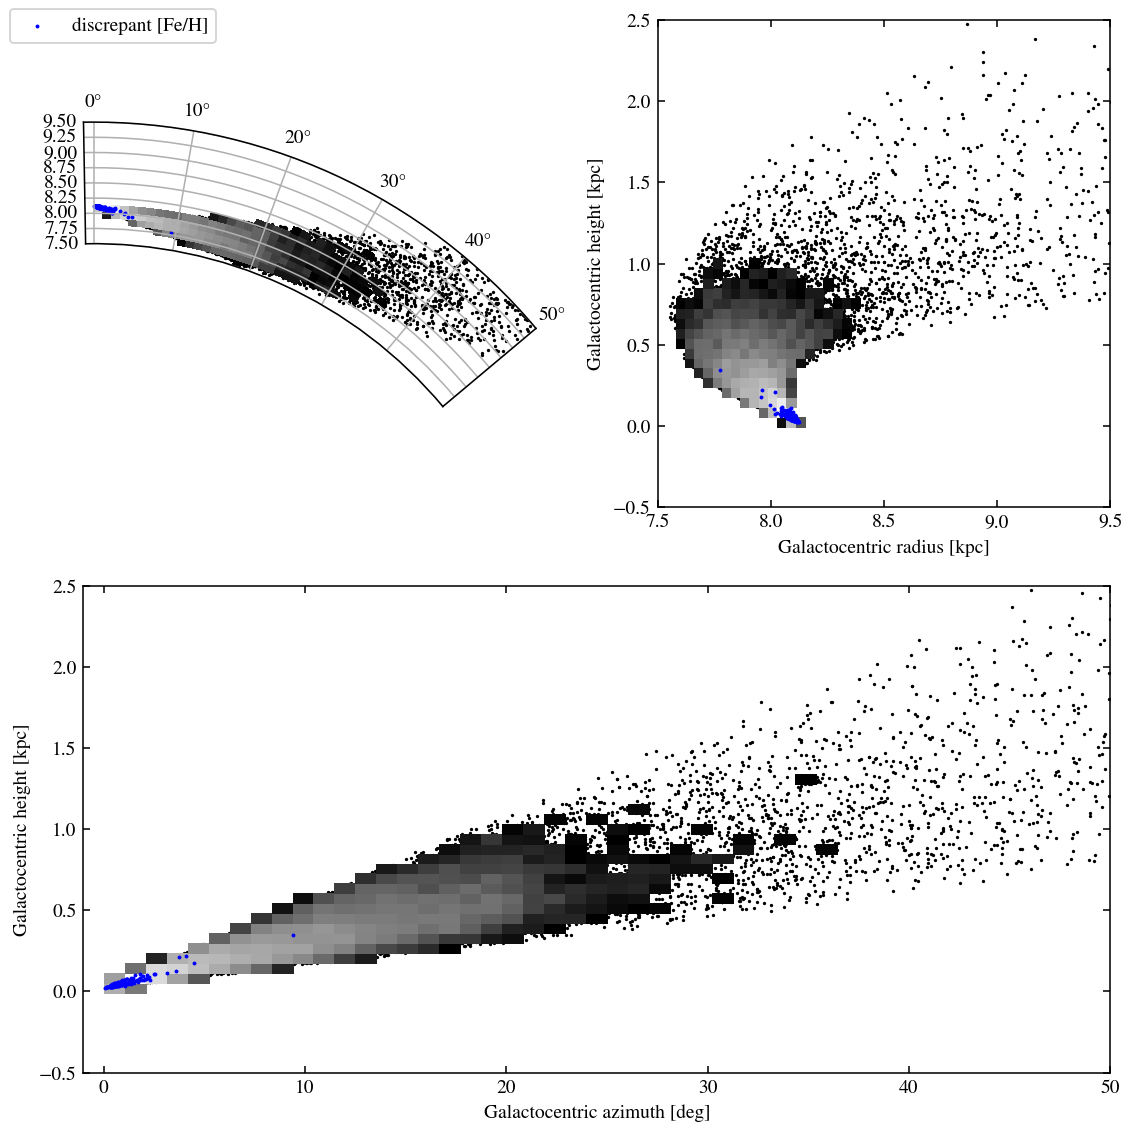

In [94]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
rlim = (7.5, 9.5)
philim_deg = (-1, 50)
philim = (philim_deg[0]*np.pi/180, philim_deg[1]*np.pi/180)
zlim = (-.5, 2.5)
gs = fig.add_gridspec(2, 2)

ax = fig.add_subplot(gs[0,0], projection='polar')
# ax = fig.add_subplot(gs[0,0])
# scatter_hist(ax, metals['ASTRONN_galphi'], metals['ASTRONN_galr'], xlim=philim, ylim=rlim)
ax.scatter(metals['ASTRONN_galphi'], metals['ASTRONN_galr'], c='k', s=0.5)
ax.hist2d(metals['ASTRONN_galphi'], metals['ASTRONN_galr'], 
          bins=[np.linspace(philim[0], philim[1], 50), 
                np.linspace(rlim[0], rlim[1], 20)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
# ax.scatter(low_age['ASTRONN_galphi'], low_age['ASTRONN_galr'], c='r', s=1, label='discrepant age')
ax.scatter(low_fe['ASTRONN_galphi'], low_fe['ASTRONN_galr'], c='b', s=1, label='discrepant [Fe/H]')
# ax.scatter(low_alpha['ASTRONN_galphi'], low_alpha['ASTRONN_galr'], c='g', s=.6, label='[O/Fe] < -0.5')
ax.grid()
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmin(rlim[0])
ax.set_rmax(rlim[1])
ax.set_rorigin(0)
# ax.set_rticks([20, 40, 60])
# ax.set_rlabel_position(340)
ax.set_xlim(philim)

ax = fig.add_subplot(gs[0,1])
scatter_hist(ax, metals['ASTRONN_galr'], metals['ASTRONN_galz'], xlim=rlim, ylim=zlim)
# ax.scatter(low_age['ASTRONN_galr'], low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galr'], low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galr'], low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(rlim)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Galactocentric height [kpc]')

ax = fig.add_subplot(gs[1,:])
scatter_hist(ax, metals['ASTRONN_galphi']*180/np.pi, metals['ASTRONN_galz'], 
             xlim=philim_deg, ylim=zlim)
# ax.scatter(low_age['ASTRONN_galphi']*180/np.pi, low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galphi']*180/np.pi, low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galphi'] * 180/np.pi, low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(philim_deg)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric azimuth [deg]')
ax.set_ylabel('Galactocentric height [kpc]')

fig.legend(loc='upper left')
plt.show()

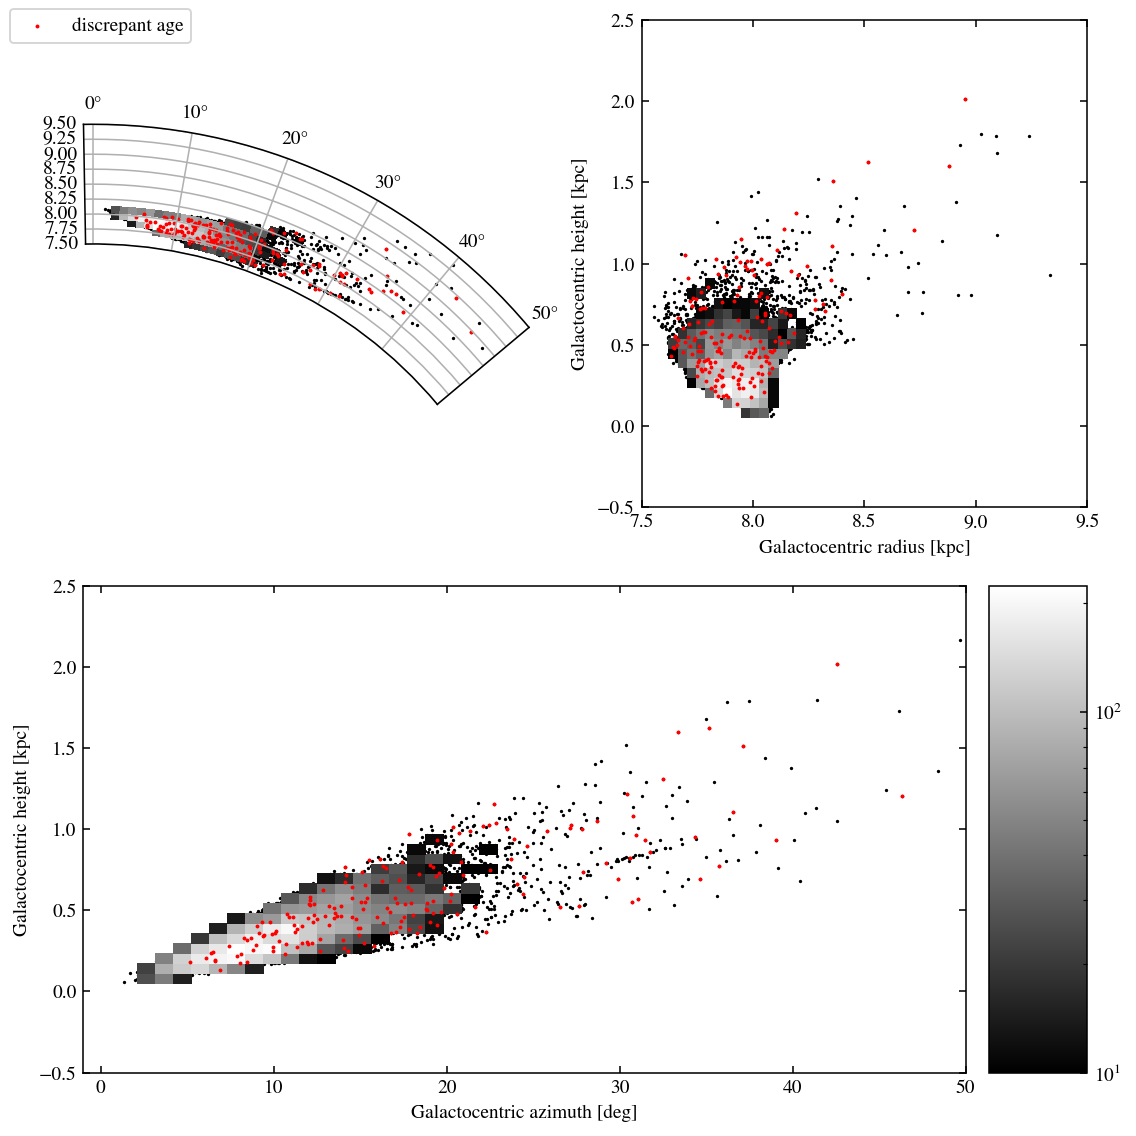

In [101]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
rlim = (7.5, 9.5)
philim_deg = (-1, 50)
philim = (philim_deg[0]*np.pi/180, philim_deg[1]*np.pi/180)
zlim = (-.5, 2.5)
gs = fig.add_gridspec(2, 10)

ax = fig.add_subplot(gs[0,0:5], projection='polar')
# ax = fig.add_subplot(gs[0,0])
# scatter_hist(ax, ages['ASTRONN_galphi'], ages['ASTRONN_galr'], xlim=philim, ylim=rlim)
ax.scatter(ages['ASTRONN_galphi'], ages['ASTRONN_galr'], c='k', s=0.5)
hist, xedges, yedges, im = ax.hist2d(ages['ASTRONN_galphi'], ages['ASTRONN_galr'], 
          bins=[np.linspace(philim[0], philim[1], 50), 
                np.linspace(rlim[0], rlim[1], 20)], 
          cmap='gray', norm=colors.LogNorm(), cmin=10)
ax.scatter(low_age['ASTRONN_galphi'], low_age['ASTRONN_galr'], c='r', s=1, label='discrepant age')
# ax.scatter(low_fe['ASTRONN_galphi'], low_fe['ASTRONN_galr'], c='b', s=1, label='discrepant [Fe/H]')
# ax.scatter(low_alpha['ASTRONN_galphi'], low_alpha['ASTRONN_galr'], c='g', s=.6, label='[O/Fe] < -0.5')
ax.grid()
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmin(rlim[0])
ax.set_rmax(rlim[1])
ax.set_rorigin(0)
# ax.set_rticks([20, 40, 60])
# ax.set_rlabel_position(340)
ax.set_xlim(philim)

ax = fig.add_subplot(gs[0,5:])
scatter_hist(ax, ages['ASTRONN_galr'], ages['ASTRONN_galz'], xlim=rlim, ylim=zlim)
ax.scatter(low_age['ASTRONN_galr'], low_age['ASTRONN_galz'], c='r', s=1)
# ax.scatter(low_fe['ASTRONN_galr'], low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galr'], low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(rlim)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Galactocentric height [kpc]')

ax = fig.add_subplot(gs[1,:9])
scatter_hist(ax, ages['ASTRONN_galphi']*180/np.pi, ages['ASTRONN_galz'], 
             xlim=philim_deg, ylim=zlim)
ax.scatter(low_age['ASTRONN_galphi']*180/np.pi, low_age['ASTRONN_galz'], c='r', s=1)
# ax.scatter(low_fe['ASTRONN_galphi']*180/np.pi, low_fe['ASTRONN_galz'], c='b', s=1)
# ax.scatter(low_alpha['ASTRONN_galphi'] * 180/np.pi, low_alpha['ASTRONN_galz'], c='g', s=.6)
ax.set_xlim(philim_deg)
ax.set_ylim(zlim)
ax.set_xlabel('Galactocentric azimuth [deg]')
ax.set_ylabel('Galactocentric height [kpc]')

# colorbar axis
ax = fig.add_subplot(gs[1,9])
plt.colorbar(im, cax=ax)

fig.legend(loc='upper left')
plt.show()